In [2]:
# Import Dependencies
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt

In [4]:
url = "https://flightprojectnorthwestern.s3.us-east-2.amazonaws.com/flights_clean.csv"

flight_df = pd.read_csv(url)

flight_df.head()
flight_df.columns

Index(['Year', 'Quarter', 'Origin', 'State departure', 'Destination Airport',
       'Airport Group', 'Ticket Carrier', 'Total Passengers', 'Ticket Cost'],
      dtype='object')

In [5]:
#filter down the cities that were the most popular destinations, create a list of relevant spaces then use it to filter the df
relevant_cities = ["LAX", "DEN", "ATL", "ORD", "BOS", "LAS", "MCO", "SFO", "DFW", "SEA", "PHX", "FLL"]

In [6]:
#create a df by narrowing down the destinations to the most popular of the 3 years (top 10 in each year)
relevant_cities_df = flight_df[flight_df["Destination Airport"].isin(relevant_cities)]

#narrow df down to only relevant data
relevant_city_data_df = relevant_cities_df[["Year", "Quarter", "Destination Airport", "Ticket Carrier", "Total Passengers", "Ticket Cost"]]


#relevant_city_data_df.Year.value_counts()


###_____________OTHER NOTES_____________###

#pick handful of airports that we KNOW are robust and reliable...5-10 airports (LAX, LAS, HNL --> pull from Sofia)

#filter out records that don't have all 3 years represented - this is still an accurate story, 
#or check out a stacked bar plot (and see if the years omitted 

#difference in years seen as a slope increase

#think about normalizing on population size for each city
#loop of unique airports, subtract the 2021 values from 2019 (or 2020)

In [7]:
#print the dataframe to see it
relevant_city_data_df

,Year,Quarter,Destination Airport,Ticket Carrier,Total Passengers,Ticket Cost
286,2019,1,PHX,AA,3.0,190.00
294,2019,1,DFW,AA,5.0,5.00
295,2019,1,DFW,AA,3.0,5.00
296,2019,1,DFW,AA,7.0,5.00
297,2019,1,DFW,AA,15.0,164.00
...,...,...,...,...,...,...
2970469,2021,4,LAX,WN,4.0,7.48
2970483,2021,4,MCO,WN,11.0,5.00
2970484,2021,4,MCO,WN,3.0,5.00
2970485,2021,4,MCO,WN,8.0,5.50


In [36]:
grouped_cities_df = relevant_city_data_df.groupby(["Destination Airport", "Year", "Quarter"]).sum().reset_index().sort_values(by = ["Year", "Quarter"], ascending = True)
grouped_cities_df

,Destination Airport,Year,Quarter,Total Passengers,Ticket Cost
0,ATL,2019,1,92010.0,2188537.00
12,BOS,2019,1,75068.0,1539634.77
24,DEN,2019,1,104435.0,1765792.31
36,DFW,2019,1,69538.0,1560395.71
48,FLL,2019,1,72676.0,1032743.90
...,...,...,...,...,...
95,MCO,2021,4,115173.0,1590187.20
107,ORD,2021,4,57235.0,881056.41
119,PHX,2021,4,79396.0,1259448.97
131,SEA,2021,4,97315.0,1783453.99


Text(0, 0.5, 'Passengers')

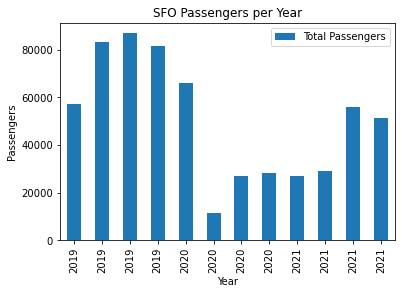

In [220]:
sfo = grouped_cities_df[(grouped_cities_df["Destination Airport"] == "SFO")]

sfo.plot(title = "SFO Passengers per Year", 
         kind = "bar", 
         x = "Year", 
         y = "Total Passengers",
        )
plt.ylabel('Passengers')


# #plt.savefig("")
#x_axis_sfo = ["2019 Q1", "2019 Q2", "2019 Q3", "2019 Q4", "2020 Q1", "2020 Q2", "2020 Q3", "2020 Q4", "2021 Q1", "2021 Q2", "2021 Q3", "2021 Q4"]

Text(0, 0.5, 'Passengers')

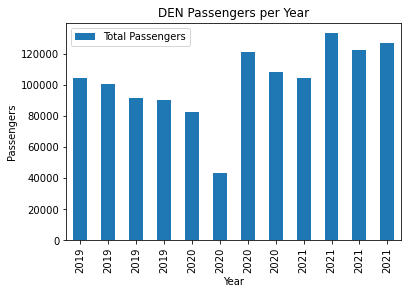

In [222]:
den = grouped_cities_df[(grouped_cities_df["Destination Airport"] == "DEN")]

den.plot(title = "DEN Passengers per Year", 
         kind = "bar", 
         x = "Year", 
         y = "Total Passengers",
        )
plt.ylabel('Passengers')

passenger_count = flight_df.groupby(["Year","Quarter"]).sum()
passenger_count.head()
x_axis = ["Q1 2019","Q2 2019","Q3 2019","Q4 2019","Q1 2020","Q2 2020","Q3 2020","Q4 2020","Q1 2021","Q2 2021","Q3 2021","Q4 2021"]
plt.plot(x_axis,passenger_count["Total Passengers"])

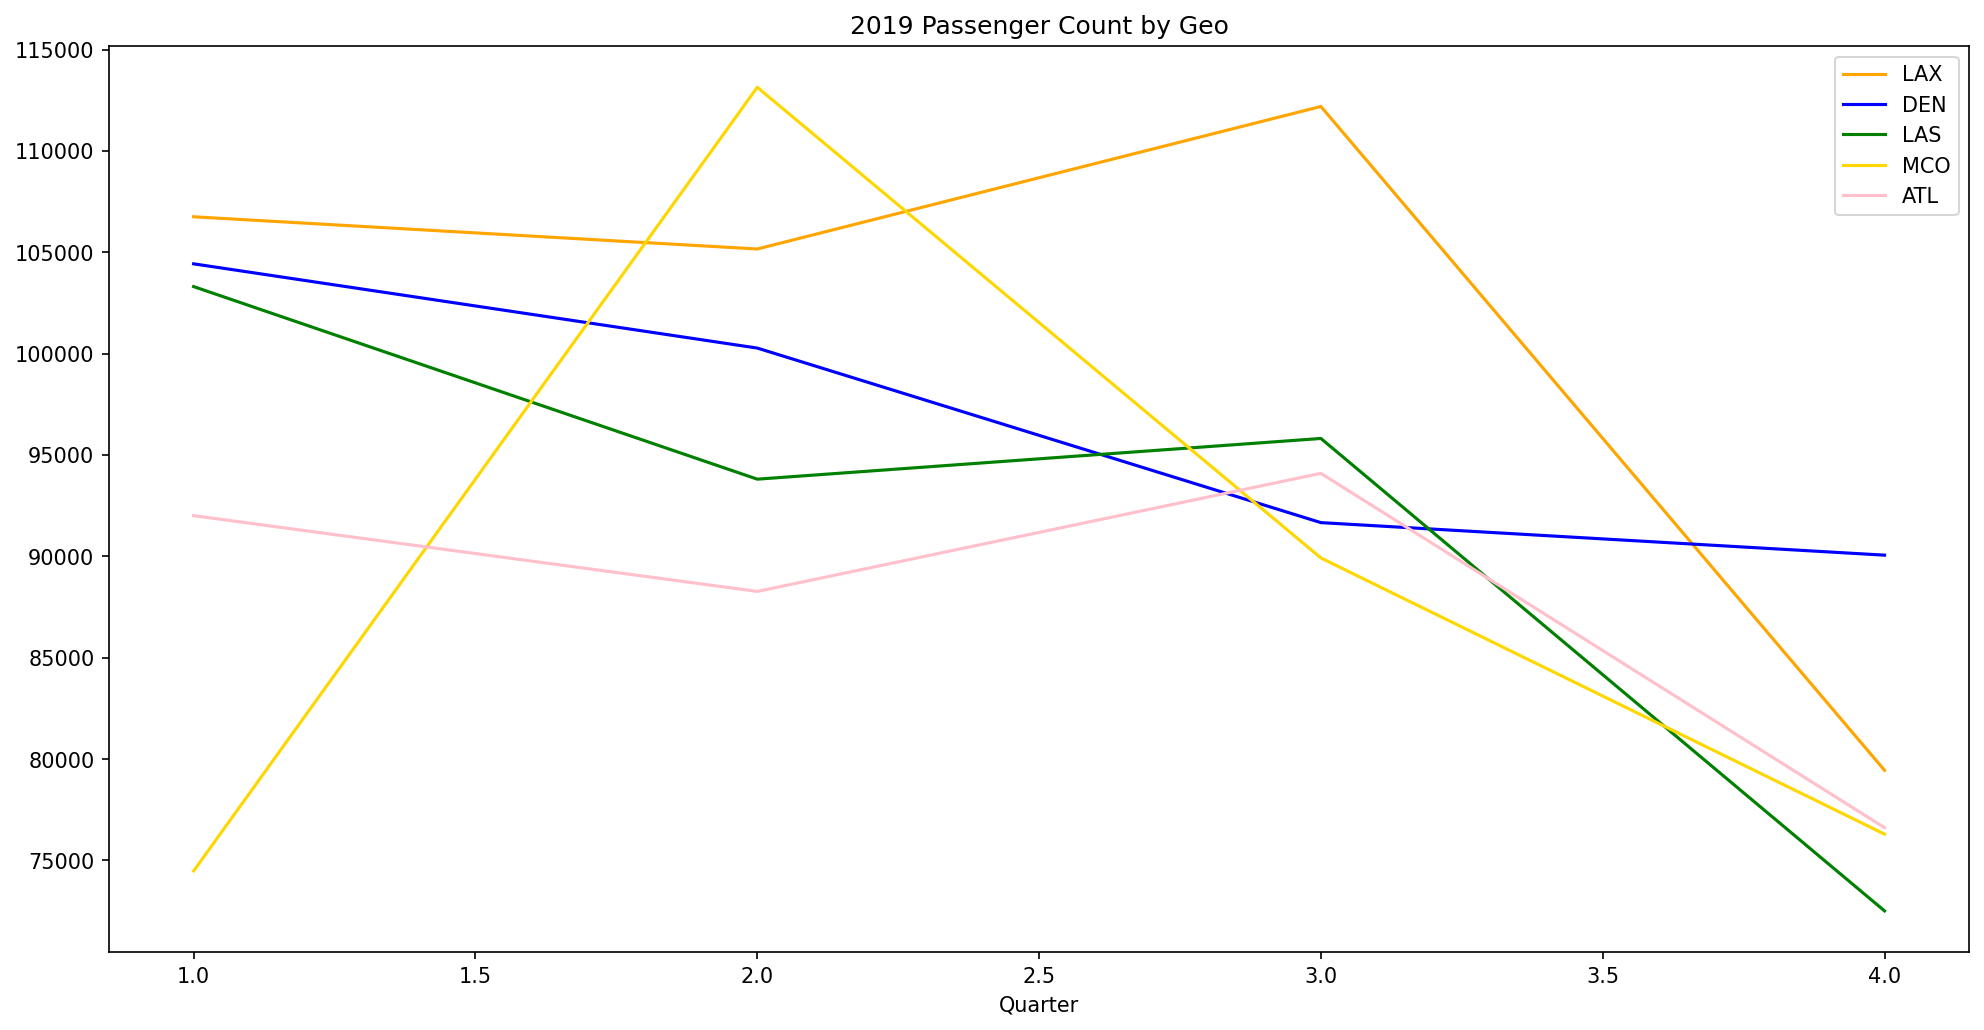

In [209]:
#make 2019 dataframes based on geo

lax_2019 = grouped_cities_df[(grouped_cities_df["Year"] == 2019) & (grouped_cities_df["Destination Airport"] == "LAX")].reset_index()
den_2019 = grouped_cities_df[(grouped_cities_df["Year"] == 2019) & (grouped_cities_df["Destination Airport"] == "DEN")].reset_index()
las_2019 = grouped_cities_df[(grouped_cities_df["Year"] == 2019) & (grouped_cities_df["Destination Airport"] == "LAS")].reset_index()
mco_2019 = grouped_cities_df[(grouped_cities_df["Year"] == 2019) & (grouped_cities_df["Destination Airport"] == "MCO")].reset_index()
atl_2019 = grouped_cities_df[(grouped_cities_df["Year"] == 2019) & (grouped_cities_df["Destination Airport"] == "ATL")].reset_index()            

plt.figure(figsize=(16, 8), dpi=150)

x_axis_lax = lax_2019["Quarter"]
x_axis_den = den_2019["Quarter"]
x_axis_las = las_2019["Quarter"]
x_axis_mco = mco_2019["Quarter"]
x_axis_atl = atl_2019["Quarter"]

plt.plot(x_axis_lax, lax_2019["Total Passengers"], label='LAX', color="orange")
plt.plot(x_axis_den, den_2019["Total Passengers"], label='DEN', color="blue")
plt.plot(x_axis_las, las_2019["Total Passengers"], label='LAS', color="green")
plt.plot(x_axis_mco, mco_2019["Total Passengers"], label='MCO', color="gold")
plt.plot(x_axis_atl, atl_2019["Total Passengers"], label='ATL', color="pink")


# adding title to the plot
plt.title("2019 Passenger Count by Geo")
  
# adding Label to the x-axis
plt.xlabel("Quarter")
  
# adding legend to the curve
plt.legend()
plt.show()

    

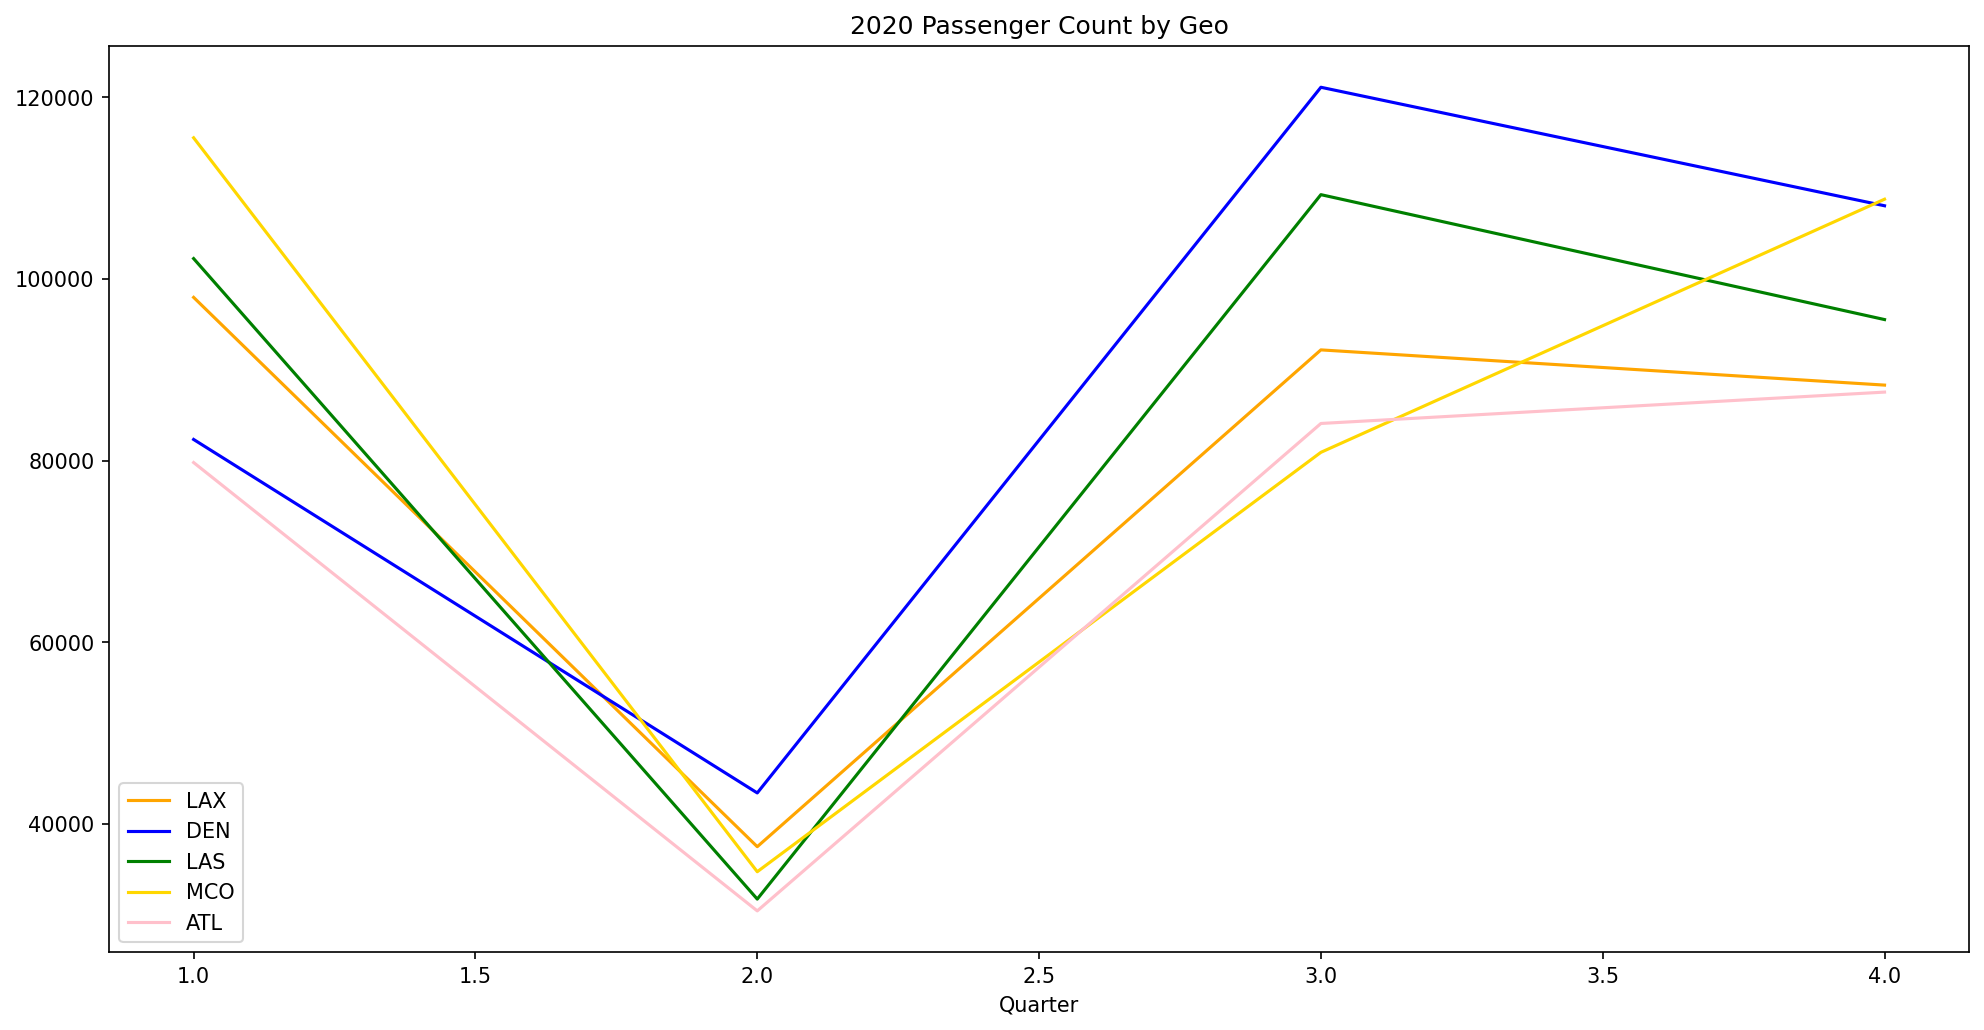

In [210]:
#make 2020 dataframes based on geo

lax_2020 = grouped_cities_df[(grouped_cities_df["Year"] == 2020) & (grouped_cities_df["Destination Airport"] == "LAX")].reset_index()
den_2020 = grouped_cities_df[(grouped_cities_df["Year"] == 2020) & (grouped_cities_df["Destination Airport"] == "DEN")].reset_index()
las_2020 = grouped_cities_df[(grouped_cities_df["Year"] == 2020) & (grouped_cities_df["Destination Airport"] == "LAS")].reset_index()
mco_2020 = grouped_cities_df[(grouped_cities_df["Year"] == 2020) & (grouped_cities_df["Destination Airport"] == "MCO")].reset_index()
atl_2020 = grouped_cities_df[(grouped_cities_df["Year"] == 2020) & (grouped_cities_df["Destination Airport"] == "ATL")].reset_index()            

plt.figure(figsize=(16, 8), dpi=150)

x_axis_lax = lax_2020["Quarter"]
x_axis_den = den_2020["Quarter"]
x_axis_las = las_2020["Quarter"]
x_axis_mco = mco_2020["Quarter"]
x_axis_atl = atl_2020["Quarter"]

plt.plot(x_axis_lax, lax_2020["Total Passengers"], label='LAX', color="orange")
plt.plot(x_axis_den, den_2020["Total Passengers"], label='DEN', color="blue")
plt.plot(x_axis_las, las_2020["Total Passengers"], label='LAS', color="green")
plt.plot(x_axis_mco, mco_2020["Total Passengers"], label='MCO', color="gold")
plt.plot(x_axis_atl, atl_2020["Total Passengers"], label='ATL', color="pink")


# adding title to the plot
plt.title("2020 Passenger Count by Geo")
  
# adding Label to the x-axis
plt.xlabel("Quarter")
  
# adding legend to the curve
plt.legend()
plt.show()

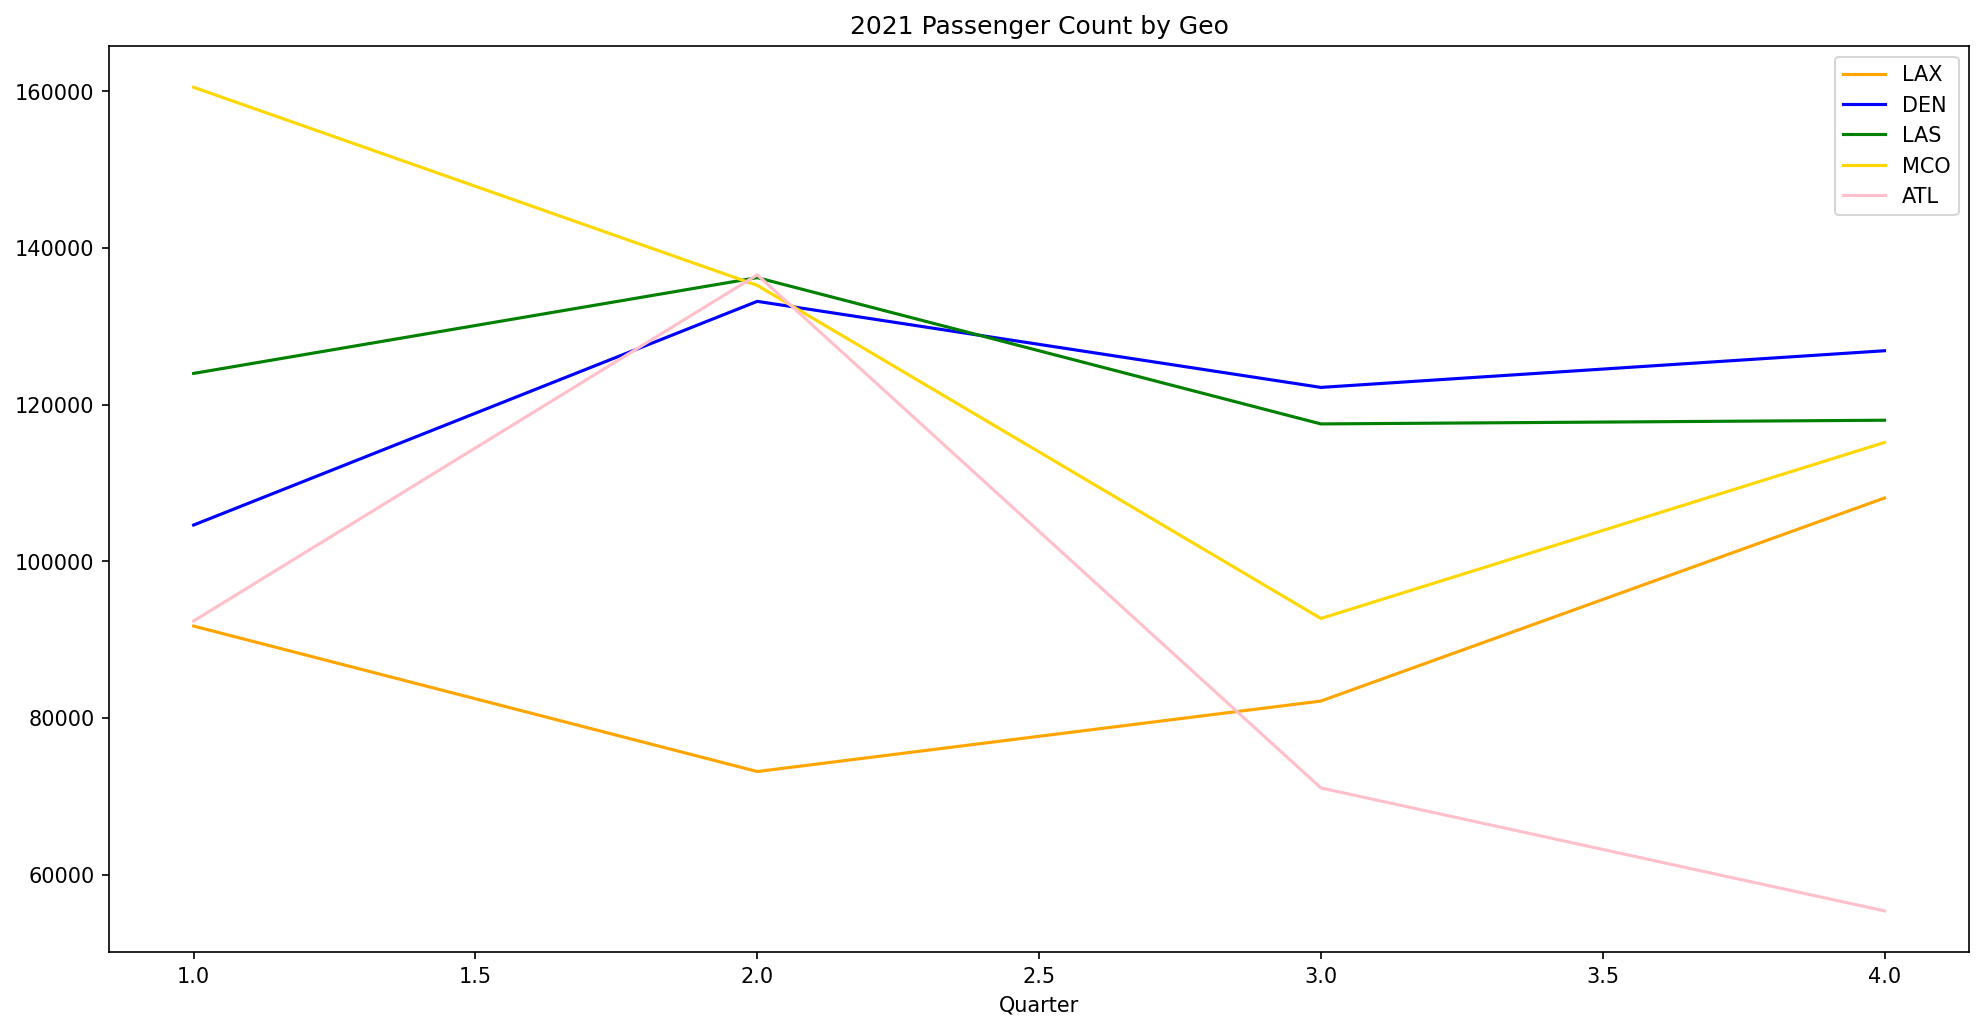

In [212]:
#make 2021 dataframes based on geo

lax_2021 = grouped_cities_df[(grouped_cities_df["Year"] == 2021) & (grouped_cities_df["Destination Airport"] == "LAX")].reset_index()
den_2021 = grouped_cities_df[(grouped_cities_df["Year"] == 2021) & (grouped_cities_df["Destination Airport"] == "DEN")].reset_index()
las_2021 = grouped_cities_df[(grouped_cities_df["Year"] == 2021) & (grouped_cities_df["Destination Airport"] == "LAS")].reset_index()
mco_2021 = grouped_cities_df[(grouped_cities_df["Year"] == 2021) & (grouped_cities_df["Destination Airport"] == "MCO")].reset_index()
atl_2021 = grouped_cities_df[(grouped_cities_df["Year"] == 2021) & (grouped_cities_df["Destination Airport"] == "ATL")].reset_index()            

plt.figure(figsize=(16, 8), dpi=150)

x_axis_lax = lax_2021["Quarter"]
x_axis_den = den_2021["Quarter"]
x_axis_las = las_2021["Quarter"]
x_axis_mco = mco_2021["Quarter"]
x_axis_atl = atl_2021["Quarter"]

plt.plot(x_axis_lax, lax_2021["Total Passengers"], label='LAX', color="orange")
plt.plot(x_axis_den, den_2021["Total Passengers"], label='DEN', color="blue")
plt.plot(x_axis_las, las_2021["Total Passengers"], label='LAS', color="green")
plt.plot(x_axis_mco, mco_2021["Total Passengers"], label='MCO', color="gold")
plt.plot(x_axis_atl, atl_2021["Total Passengers"], label='ATL', color="pink")


# adding title to the plot
plt.title("2021 Passenger Count by Geo")
  
# adding Label to the x-axis
plt.xlabel("Quarter")
  
# adding legend to the curve
plt.legend()
plt.show()

In [166]:





######________________ABANDONED_CODE________________######


# lax_2019["Total Passengers"].plot(x = lax_2019["Quarter"], label='LAX', color="orange")
# den_2019["Total Passengers"].plot(x = den_2019["Quarter"], label='DEN', color="blue")
# las_2019["Total Passengers"].plot(x = las_2019["Quarter"], label='LAS', color="green")
# mco_2019["Total Passengers"].plot(x = mco_2019["Quarter"], label='MCO', color="gold")
# atl_2019["Total Passengers"].plot(x = atl_2019["Quarter"], label='ATL', color="pink")
  

# atl.plot(title = "ATL Passengers per Year", 
#          kind = "bar", 
#          x = "Year", 
#          y = "Total Passengers",
#         )
# plt.ylabel('Passengers')

# mco.plot(title = "MCO Passengers per Year", 
#          kind = "bar", 
#          x = "Year", 
#          y = "Total Passengers",
#         )
# plt.ylabel('Passengers')

# las.plot(title = "LAS Passengers per Year", 
#          kind = "bar", 
#          x = "Year", 
#          y = "Total Passengers",
#         )
# plt.ylabel('Passengers')
#plt.savefig("LAS")

# lax.plot(title = "LAX Passengers per Year", 
#          kind = "bar", 
#          x = "Year", 
#          y = "Total Passengers",
#         )
# plt.ylabel('Passengers')
#plt.savefig("LAX")

# x_axis_den = ["2019 Q1", "2019 Q2", "2019 Q3", "2019 Q4", "2020 Q1", "2020 Q2", "2020 Q3", "2020 Q4", "2021 Q1", "2021 Q2", "2021 Q3", "2021 Q4"]
# y_axix_den = den["Total Passengers"]


# plt.plot(x_axis_den, y_axix_den)

# den.plot(title = "DEN Passengers per Year", 
#          kind = "scatter", 
#          x = "Year", 
#          y = "Total Passengers",
#         )
# plt.ylabel('Passengers')

# lax_2019.plot(x = "Quarter", y = "Total Passengers", label = "LAX")
# den_2019.plot(x = "Quarter", y = "Total Passengers", label = "DEN")
# las_2019.plot(x = "Quarter", y = "Total Passengers", label = "LAS")
# mco_2019.plot(x = "Quarter", y = "Total Passengers", label = "MCO")  
# atl_2019.plot(x = "Quarter", y = "Total Passengers", label = "ATL")
                       
# plt.legend()
# plt.plot()

#plt.savefig("DEN")